# WeatherAPI


---

# Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
import json

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '%20')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | patacamaya
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | muynoq
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | langepas
Processing Record 13 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | san jose de jachal
Processing Record 19 of Set 1 | rio preto da eva
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,268.33,83,98,4.63,GS,1691429819
1,bredasdorp,-34.5322,20.0403,284.46,83,0,1.52,ZA,1691429819
2,yellowknife,62.4560,-114.3525,291.44,48,75,4.63,CA,1691429820
3,hamilton,39.1834,-84.5333,298.76,91,100,8.75,US,1691429820
4,patacamaya,-17.2333,-67.9167,288.00,20,5,3.14,BO,1691429820


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display data from saved file
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,268.33,83,98,4.63,GS,1691429819
1,bredasdorp,-34.5322,20.0403,284.46,83,0,1.52,ZA,1691429819
2,yellowknife,62.4560,-114.3525,291.44,48,75,4.63,CA,1691429820
3,hamilton,39.1834,-84.5333,298.76,91,100,8.75,US,1691429820
4,patacamaya,-17.2333,-67.9167,288.00,20,5,3.14,BO,1691429820


### Create the Scatter Plots
#### Latitude Vs. Temperature

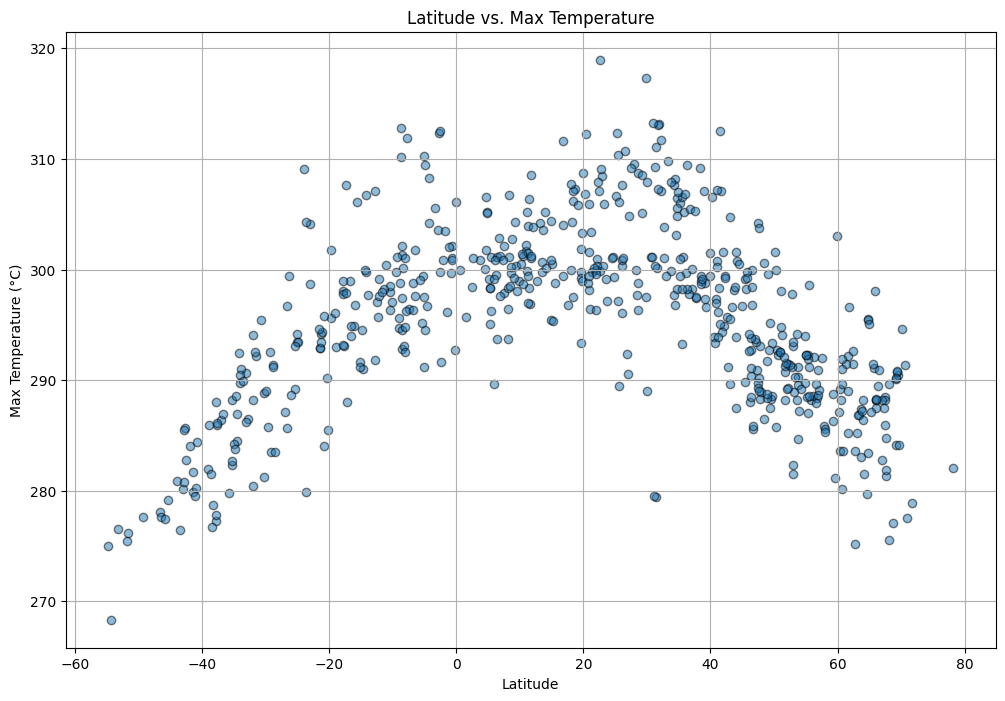

In [8]:
# Build scatter plot for latitude vs. temperature

latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, max_temp, alpha=0.5, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')  
plt.title('Latitude vs. Max Temperature')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

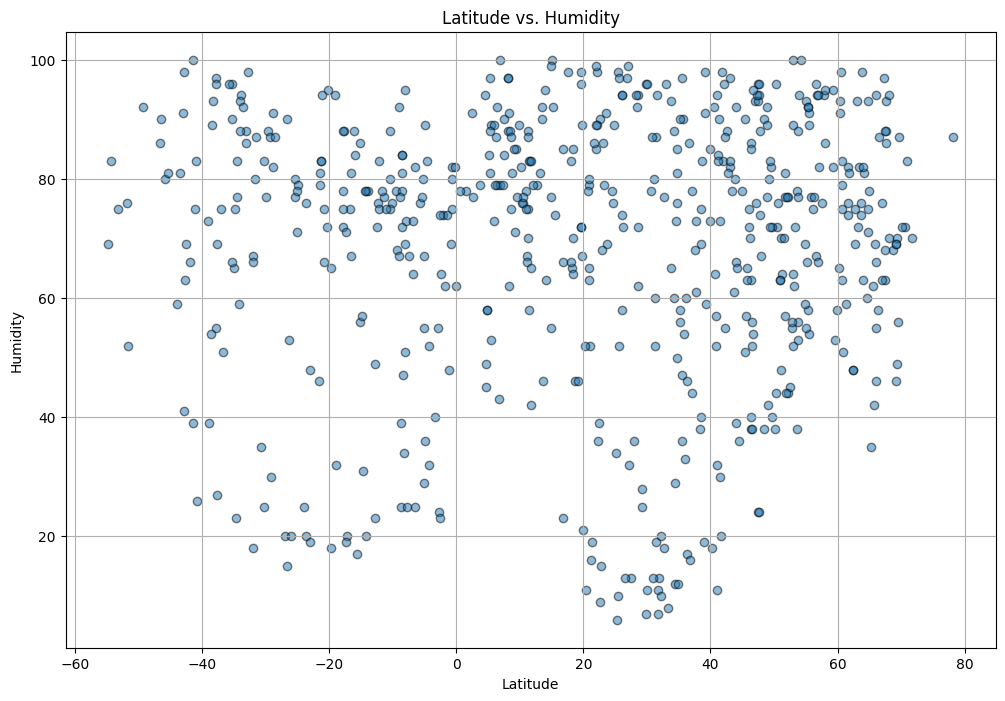

In [9]:
# Build scatter plot for latitude vs. humidity

latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, humidity, alpha=0.5, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Humidity')  
plt.title('Latitude vs. Humidity')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

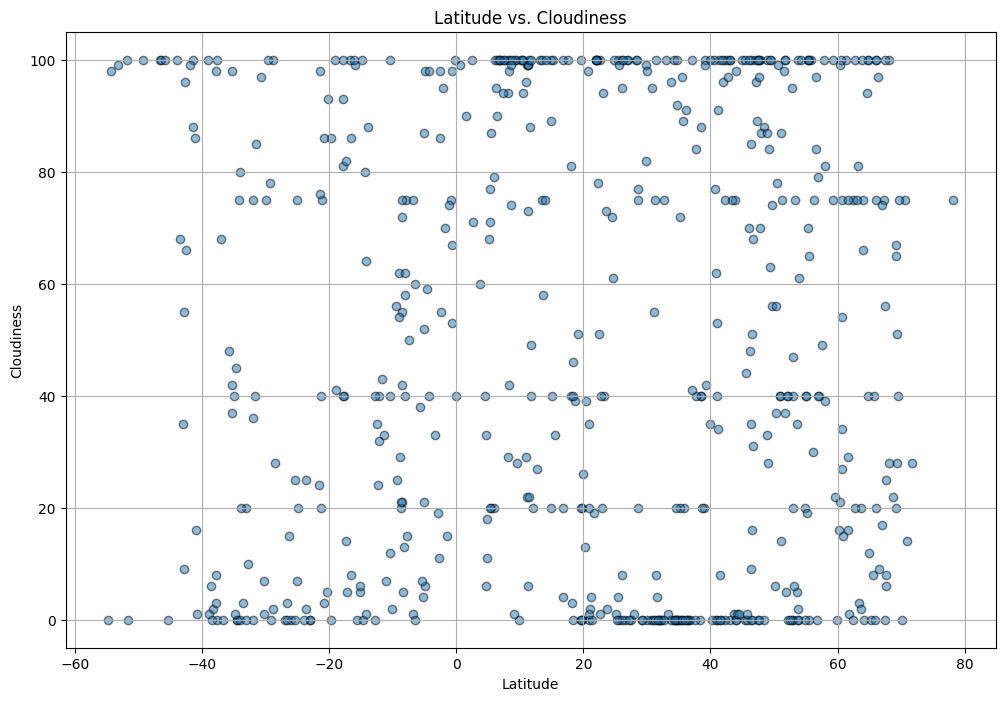

In [10]:
# Build scatter plot for latitude vs. cloudiness

latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, cloudiness, alpha=0.5, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')  
plt.title('Latitude vs. Cloudiness')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

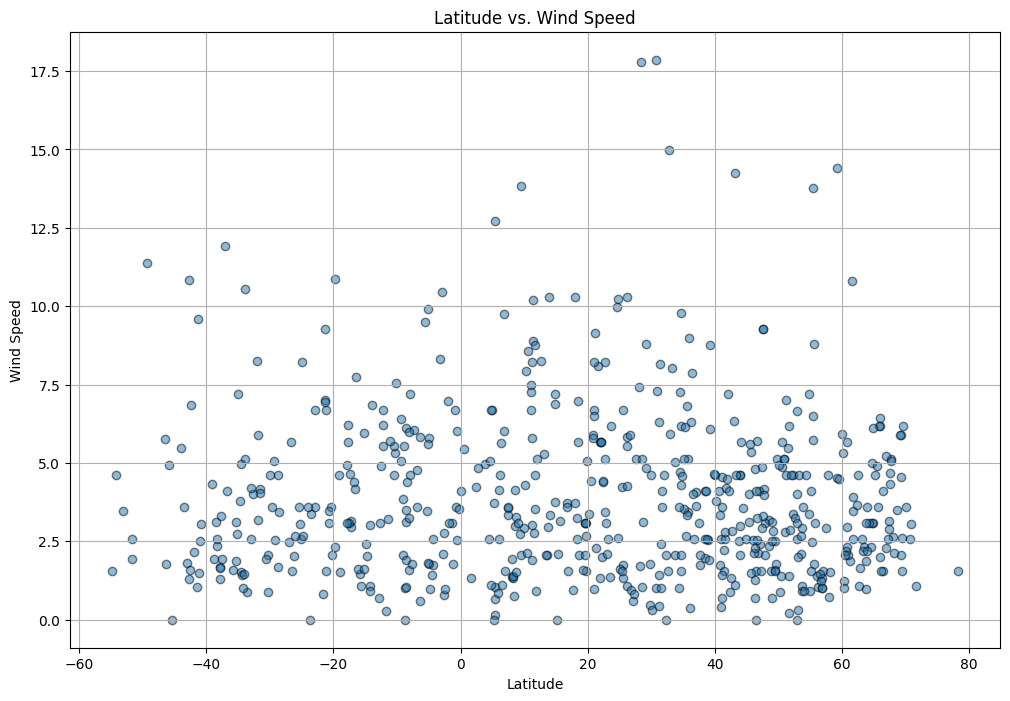

In [11]:
# Build scatter plot for latitude vs. cloudiness

latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']

plt.figure(figsize=(12, 8)) 
plt.scatter(latitude, wind, alpha=0.5, edgecolors='k')

# Add labels, title, and grid
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')  
plt.title('Latitude vs. Wind Speed')

plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [82]:
# Define function to draw linear regression plots. 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_linear_regression(x, y, xlab, ylab, t, fx, fy):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    # Create the regression line
    regression_line = slope * x + intercept

    # Print the r-value
    print(f"The r-value is: {r_value:.2f}")

    # Plot the data points and the regression line
    plt.scatter(x, y, label='Data')
    plt.plot(x, regression_line, color='red', label='Linear Regression')

    # Set labels and legend
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(t)

    # Display the equation on the plot (superimposed in red text)
    equation_text = f"Y = {slope:.2f}X + {intercept:.2f}"
    plt.annotate(equation_text, xy=(fx, fy), xycoords='axes fraction', fontsize=12, color='red', ha='center')

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,291.44,48,75,4.63,CA,1691429820
3,hamilton,39.1834,-84.5333,298.76,91,100,8.75,US,1691429820
6,muynoq,43.7683,59.0214,298.19,61,1,2.50,UZ,1691429605
11,langepas,61.2544,75.2124,291.43,59,100,1.88,RU,1691429823
12,ust-nera,64.5667,143.2000,279.67,60,94,2.31,RU,1691429824


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,268.33,83,98,4.63,GS,1691429819
1,bredasdorp,-34.5322,20.0403,284.46,83,0,1.52,ZA,1691429819
4,patacamaya,-17.2333,-67.9167,288.00,20,5,3.14,BO,1691429820
5,waitangi,-43.9535,-176.5597,280.83,59,100,5.47,NZ,1691429821
7,atafu village,-8.5421,-172.5159,301.28,72,21,6.10,TK,1691429778


The r-value is: -0.66


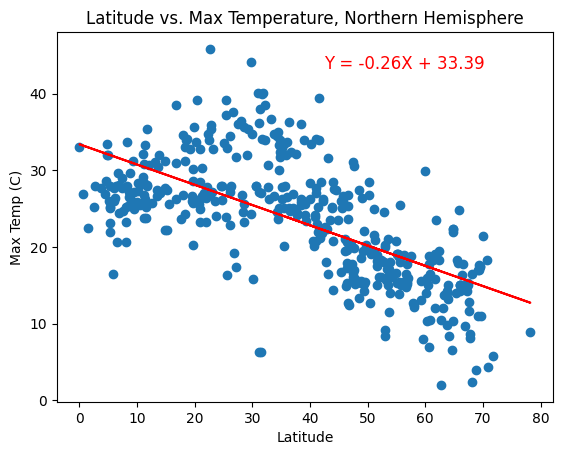

In [87]:
# Northern Hemisphere Temperature vs. Latitude

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp'] - 273.15 # convert values to celsius
xlab = 'Latitude'
ylab = 'Max Temp (C)'
t = 'Latitude vs. Max Temperature, Northern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .7, .9)

#### ^ North Lat vs. Temp: As Latitude increases (away from the Equator), Temperature decreases, and this relationship is moderately strong.

The r-value is: 0.83


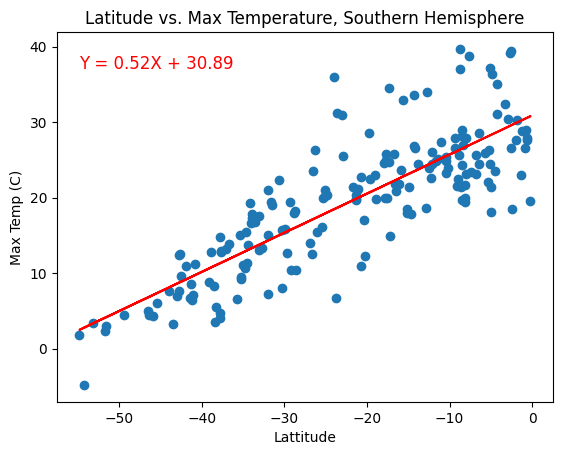

In [89]:
# Southern Hemisphere Temperature vs. Latitude

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp'] - 273.15 # convert values to celsius
xlab = 'Lattitude'
ylab = 'Max Temp (C)'
t = 'Latitude vs. Max Temperature, Southern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .2, .9)

#### South Lat vs. Temp ^: There is a very strong correlation between Latitude and Max Temperature in the Southern Hemisphere, with temperatures rising as Latitude increases (moves towards the Equator). 

The r-value is: -0.00


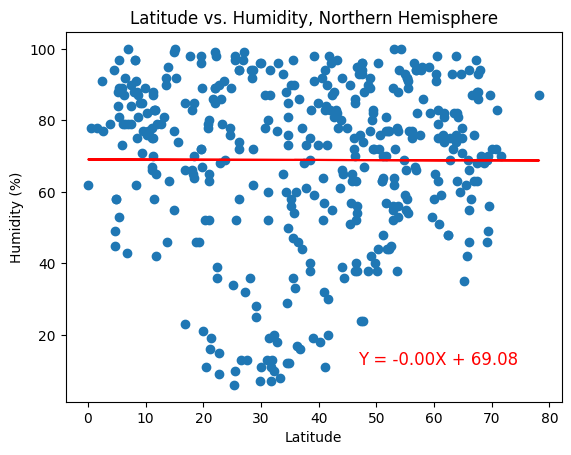

In [92]:
# Northern Hemisphere Humidity vs. Latitude

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity'] 
xlab = 'Latitude'
ylab = 'Humidity (%)'
t = 'Latitude vs. Humidity, Northern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .75, .1)

#### North Lat vs. Humidity ^: There does not appear to be any correlation at all between Latitude vs. Humidity.

The r-value is: -0.15


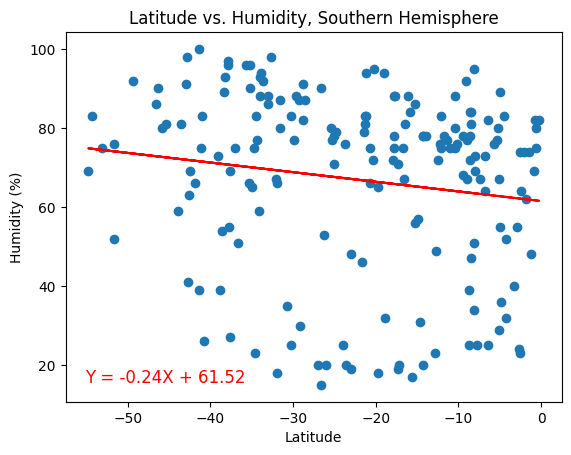

In [94]:
# Southern Hemisphere Humidity vs. Latitude

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity'] 
xlab = 'Latitude'
ylab = 'Humidity (%)'
t = 'Latitude vs. Humidity, Southern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .2, .05)

#### South Lat vs. Humidity ^: There is only a very minor corelation between Latitude vs. Humidity in the Southern hemisphere, with Humidity somewhat decreasing as Latitude rises (moves towards Equator).

The r-value is: -0.10


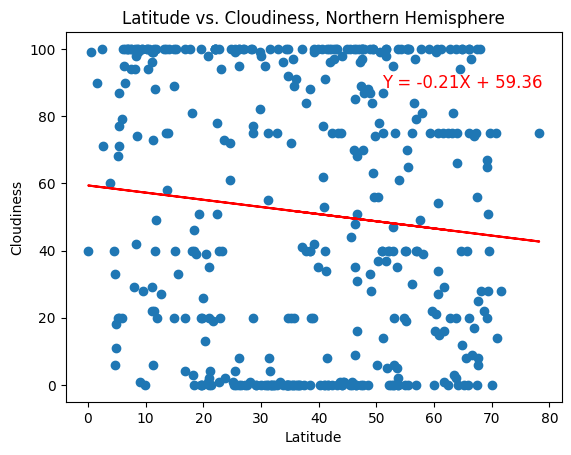

In [97]:
# Northern Hemisphere Cloudiness vs. Latitude

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness'] 
xlab = 'Latitude'
ylab = 'Cloudiness'
t = 'Latitude vs. Cloudiness, Northern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .8, .85)

#### North Lat vs. Cloudiness ^: Cloudiness may decrease somewhat as Latitude rises (moves away from the Equator), but this model show only a weak correlation.

The r-value is: -0.01


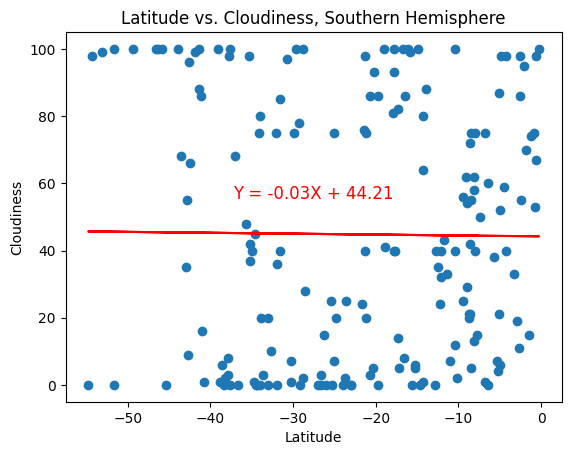

In [101]:
# Southern Hemisphere Cloudiness vs. Latitude

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness'] 
xlab = 'Latitude'
ylab = 'Cloudiness'
t = 'Latitude vs. Cloudiness, Southern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .5, .55)

#### South Lat vs. Cloudiness: There is virtually no correlation here.

The r-value is: -0.13


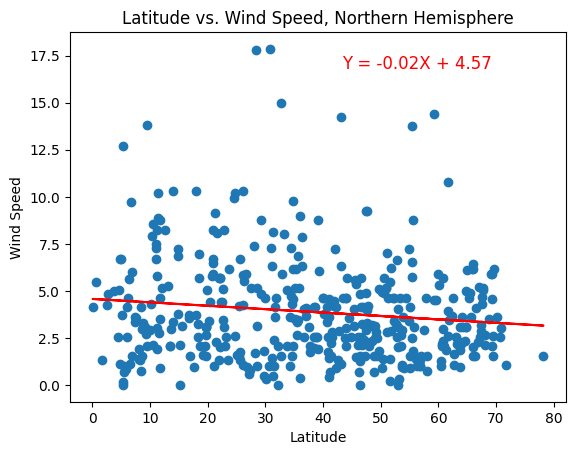

In [107]:
# Northern Hemisphere Wind Speed vs. Latitude

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed'] 
xlab = 'Latitude'
ylab = 'Wind Speed'
t = 'Latitude vs. Wind Speed, Northern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .7, .9)

#### North Lat vs. Wind Speed ^: There is only a weak correlation between Lat and Wind Speed in the Northern Hemisphere, barely enough to suggest that Wind Speed may decrease as Latitude increases (away from the Equator).

The r-value is: 0.05


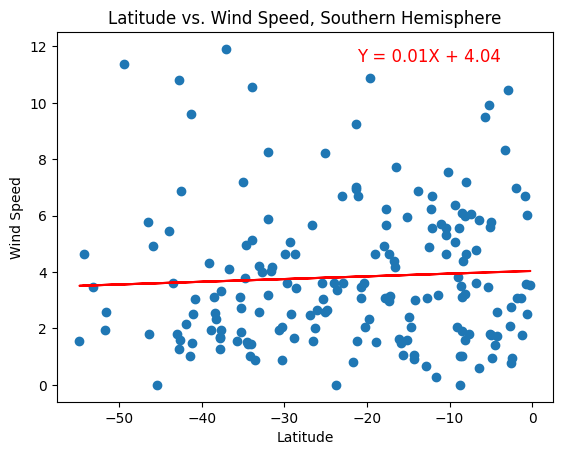

In [106]:
# Southern Hemisphere Wind Speed vs. Latitude

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed'] 
xlab = 'Latitude'
ylab = 'Wind Speed'
t = 'Latitude vs. Wind Speed, Southern Hemisphere'

plot_linear_regression(x, y, xlab, ylab, t, .75, .92)

#### South Lat vs. Wind Speed ^: There is only a weak correlation between Lat and Wind Speed in the Southern Hemisphere, barely enough to suggest that Wind Speed may increase as Latitude increases (towards the Equator).